In [1]:
%load_ext watermark

In [2]:
%watermark -a "Michal Dyzma" -t -d -v -m -p numpy,scipy,pandas

Michal Dyzma 2017-07-16 12:57:38 

CPython 3.6.1
IPython 6.1.0

numpy 1.12.1
scipy 0.19.1
pandas 0.20.2

compiler   : MSC v.1900 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 60 Stepping 3, GenuineIntel
CPU cores  : 4
interpreter: 64bit


# Protein concentration

## Theoretical Background

Example of simple experiment with data from VIS spectrophotometric experiment. Lets assume specific substance is changing properties of the solution. For example when specific dye or biochemical reaction causes solution coloring, making it less penetrable by light. 

For a uniform absorbing solution  the proportion of light passing through is called the transmittance: $T$, and the proportion of light absorbed by molecules in the medium is absorbance, $Abs$. 

Transmittance is defined as:

$$T =  \frac{I}{I_{o}} $$

where:

* $I_o$ is intensity of the incident radiation entering the medium.
* $I$ = intensity of the transmitted radiation leaving the medium.


T can be expressed as percent transmittance, $\%T$:

$$%T = \frac{I}{I_{o}} \times 100$$

The relationship between percent transmittance ($\%T$) and absorbance ($Abs$) is given by the following equation:

$$Abs = 2 - log (%T) $$

From above equation we can see, that probe, which absorbs 100% of the light will have absorbance equal 2 ($log_{10} 100 = 2$), while completely transparent sample will have absorbance 0. Therefore theoretical span of Absorbance values range from 0 to 2, however Beer-Lambert's law is most accurate in range 0.05 to 0.7 $Abs$.

The Beer-Lambert Law states that Absorbance is proportional to the concentration of the absorbing molecules, the length of light-path through the medium and the molar extinction coefficient:

$$ Abs = \epsilon \cdot c \cdot l $$

where:

* $Abs$ – absorbance
* $\epsilon$ – light extinction coefficient at max absorption wavelength $\lambda_{max}$
* $c$ – substance concentration
* $l$ – length of light-path


## Determine the absorption spectra

In [31]:
# Basic pyton packages import
import pandas as pd
import numpy as np

# graphs appear in the notebook
%matplotlib inline

In [37]:
# generate data
# absorbance of the sample at 50 nm intervals between 350-700 nm.
x = range(350, 710, 10)

#random values 
y = np.random.uniform(0,0.7,len(x))

print(y)
print(list(x))

[ 0.31980396  0.49344644  0.45863879  0.44316801  0.32921934  0.2994223
  0.68387623  0.46450459  0.07688804  0.2913369   0.68336058  0.46631606
  0.32795173  0.44044983  0.36058184  0.16635089  0.49369531  0.43265876
  0.52955646  0.40010794  0.53115408  0.30780651  0.38292307  0.6024809
  0.06196775  0.01809393  0.35955855  0.49190845  0.07539733  0.12108224
  0.07605049  0.46051179  0.483208    0.32047623  0.18792772  0.1420333 ]
[350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700]


In [43]:
#I stored batch of data n csv file to mimic wet lab procedure

#Read measurements from file
df = pd.read_csv("data/lambda_max.csv", header=None, names=["Absorbance"])
df.describe()

       Absorbance
count   36.000000
mean     0.355109
std      0.176637
min      0.018094
25%      0.265485
50%      0.371752
75%      0.470539
max      0.683876


In [44]:
# Find maximal wavelenght for which absorbance is highest
df['Absorbance'].argmax()

410

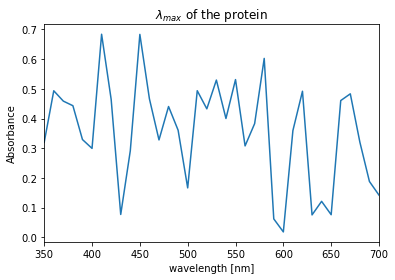

In [50]:
ax = df.Absorbance.plot(title="$\lambda_{max}$ of the protein")
ax.set_ylabel("Absorbance")
ax.set_xlabel("wavelength [nm]")

## Calculate the extinction coefficient ($\epsilon$) of the standards

$$ \epsilon =  \frac{Abs}{c \cdot l} $$

Absorbance at 410 nm ws highest and was equal 0.683876

In [52]:
# Abs_410 = 0.683876
epsilon = 0.683876/(0.110*1)
epsilon

6.217054545454546

## Determine the concentration of proteins in solution

In [57]:
# Calibration curve
concentration = np.array([5, 10, 25, 30, 40, 50, 60, 70])
absorbance = np.array([0.106, 0.236, 0.544, 0.690, 0.791, 0.861, 0.882, 0.911])


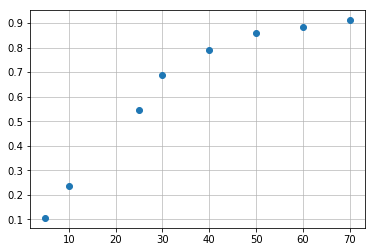

In [71]:
import matplotlib.pyplot as plt
plt.plot(concentration, absorbance, 'o', label='original data')
plt.grid(alpha=0.8)

In [92]:
# Linear regression
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(concentration, absorbance)
print("r-squared: {}".format(r_value**2))
print(slope)
print(intercept)

r-squared: 0.8754454029810919
0.0124571906355
0.176051839465


In [ ]:
x = (absorbance - intercept)/slope

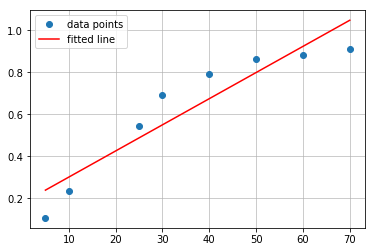

In [87]:
plt.plot(concentration, absorbance, 'o', label='data points')
plt.plot(concentration, intercept + slope*concentration, 'r', label='fitted line')
plt.legend()
plt.grid(alpha=0.8)

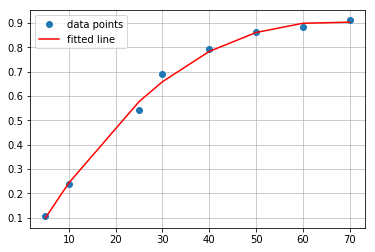

In [88]:
#polynomial fit
import numpy.polynomial.polynomial as poly

coefs = poly.polyfit(concentration, absorbance, 3)
ffit = poly.polyval(concentration, coefs)

plt.plot(concentration, absorbance, 'o', label='data points')
plt.plot(concentration, ffit, 'r', label='fitted line')
plt.legend()
plt.grid(alpha=0.8)


In [93]:
print(coefs)

[ -6.29998061e-02   3.40965628e-02  -3.68738266e-04   1.12600636e-06]


In [94]:
np.roots(coefs)

array([ 0.53024215+0.j        ,  0.00548740+0.00189632j,
        0.00548740-0.00189632j])

In [95]:
%pwd

'C:\\Users\\Michal\\Documents\\IPython'